<a href="https://colab.research.google.com/github/Saptarshi-iitbhu/XGB-Thermal-Conductivity-Measurement/blob/main/XGB_relevant_feat_imp_code_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Importing data, replace with the file name of the data
df = pd.read_csv("/content/all_data_used_in_model.csv")

In [ ]:
df

,Thermal Conductivity(W/mK),Post Sintering Pressure,Oxygen Content,Particle size(d50 um),Purity,Y2O3,MgO,Aluminium,N2/N2:H2 = 1/0,Nitriding Temperature(degC),Nitriding Time(h),Post Sintering Temperature(degC),Post Sintering Time(h)
0,102.0,1.0,0.28,8.5,99.99,2.0,5.0,0.0,1,1400,4.0,1850,60
1,102.4,1.0,0.28,8.5,99.99,2.0,5.0,0.0,1,1400,4.0,1850,60
2,103.4,1.0,0.28,8.5,99.99,2.0,5.0,0.0,1,1400,4.0,1850,60
3,101.3,1.0,0.28,8.5,99.99,2.0,5.0,0.0,1,1400,4.0,1850,60
4,99.0,1.0,0.28,8.5,99.99,2.0,5.0,0.0,1,1400,4.0,1850,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,151.0,1.0,0.51,2.7,99.99,2.5,5.0,0.0,1,1400,4.0,1900,24
118,143.0,1.0,0.51,2.7,99.99,3.0,5.0,0.0,1,1400,4.0,1900,24
119,136.0,1.0,0.51,2.7,99.99,5.0,5.0,0.0,1,1400,4.0,1900,24
120,86.0,1.0,4.22,4.0,99.99,2.0,5.0,0.0,1,1400,6.0,1900,12


In [ ]:
df = df.drop('Oxygen Content', axis=1)

In [ ]:
np.where(df['Post Sintering Pressure'] ==0.1)

(array([ 6, 29, 31, 46, 47, 48]),)

In [ ]:
df['Post Sintering Pressure'] = np.where((df['Post Sintering Pressure'] == 'Not mentioned'), 1, df['Post Sintering Pressure'])

In [ ]:
df = df.astype(float)

In [ ]:
df.isnull().values.sum()

np.int64(0)

In [ ]:
df.corr()

,Thermal Conductivity(W/mK),Post Sintering Pressure,Particle size(d50 um),Purity,Y2O3,MgO,Aluminium,N2/N2:H2 = 1/0,Nitriding Temperature(degC),Nitriding Time(h),Post Sintering Temperature(degC),Post Sintering Time(h)
Thermal Conductivity(W/mK),1.000000,0.381196,0.222712,0.400050,0.036843,0.028325,-0.215540,0.380488,0.193742,-0.040256,0.290951,0.380449
Post Sintering Pressure,0.381196,1.000000,0.247585,0.437746,-0.188272,-0.080408,-0.030437,-0.035527,0.065347,-0.162312,0.606780,0.160454
Particle size(d50 um),0.222712,0.247585,1.000000,0.452902,-0.100207,-0.167842,-0.095523,0.074230,0.082539,0.044325,-0.220109,0.376356
Purity,0.400050,0.437746,0.452902,1.000000,-0.254180,-0.220985,0.075226,-0.187460,0.401290,-0.323166,0.075771,0.170703
Y2O3,0.036843,-0.188272,-0.100207,-0.254180,1.000000,0.085283,-0.001060,0.243097,-0.078963,0.207761,-0.144843,0.006754
MgO,0.028325,-0.080408,-0.167842,-0.220985,0.085283,1.000000,-0.254945,-0.045880,-0.093842,-0.378388,-0.132165,0.112878
Aluminium,-0.215540,-0.030437,-0.095523,0.075226,-0.001060,-0.254945,1.000000,0.060833,0.017929,0.182311,0.040642,-0.075966
N2/N2:H2 = 1/0,0.380488,-0.035527,0.074230,-0.187460,0.243097,-0.045880,0.060833,1.000000,-0.186783,0.586535,0.048788,0.273106
Nitriding Temperature(degC),0.193742,0.065347,0.082539,0.401290,-0.078963,-0.093842,0.017929,-0.186783,1.000000,-0.116977,0.123125,-0.045364
Nitriding Time(h),-0.040256,-0.162312,0.044325,-0.323166,0.207761,-0.378388,0.182311,0.586535,-0.116977,1.000000,-0.003230,-0.100396


In [ ]:
normalized_df=(df-df.mean())/df.std()
tc_std = df['Thermal Conductivity(W/mK)'].std()
tc_mean = df['Thermal Conductivity(W/mK)'].mean()

In [ ]:
# normalized_df['Sintering Pressure'].head(50)
(normalized_df['Thermal Conductivity(W/mK)']*tc_std)+tc_mean

,Thermal Conductivity(W/mK)
0,102.0
1,102.4
2,103.4
3,101.3
4,99.0
...,...
117,151.0
118,143.0
119,136.0
120,86.0


<Axes: >

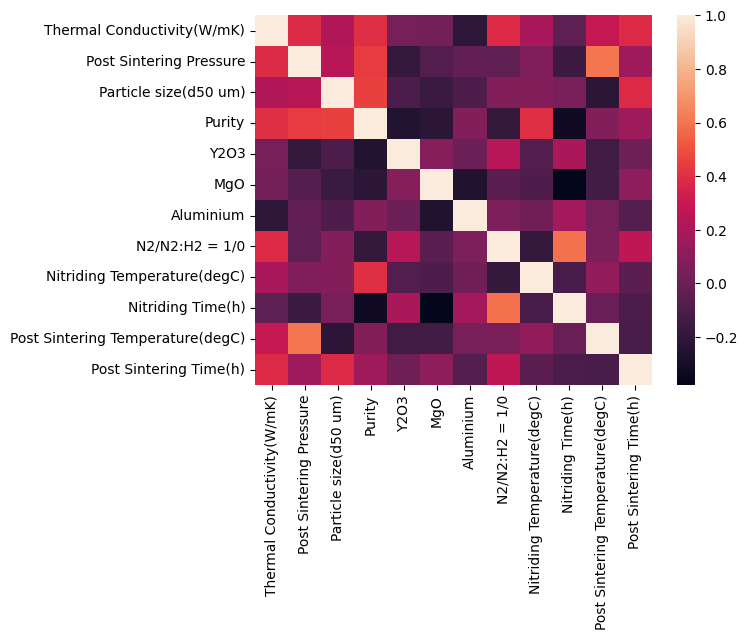

In [ ]:
import seaborn as sns
%matplotlib inline

# load the Auto dataset
auto_df = df

# calculate the correlation matrix on the numeric columns
corr = auto_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

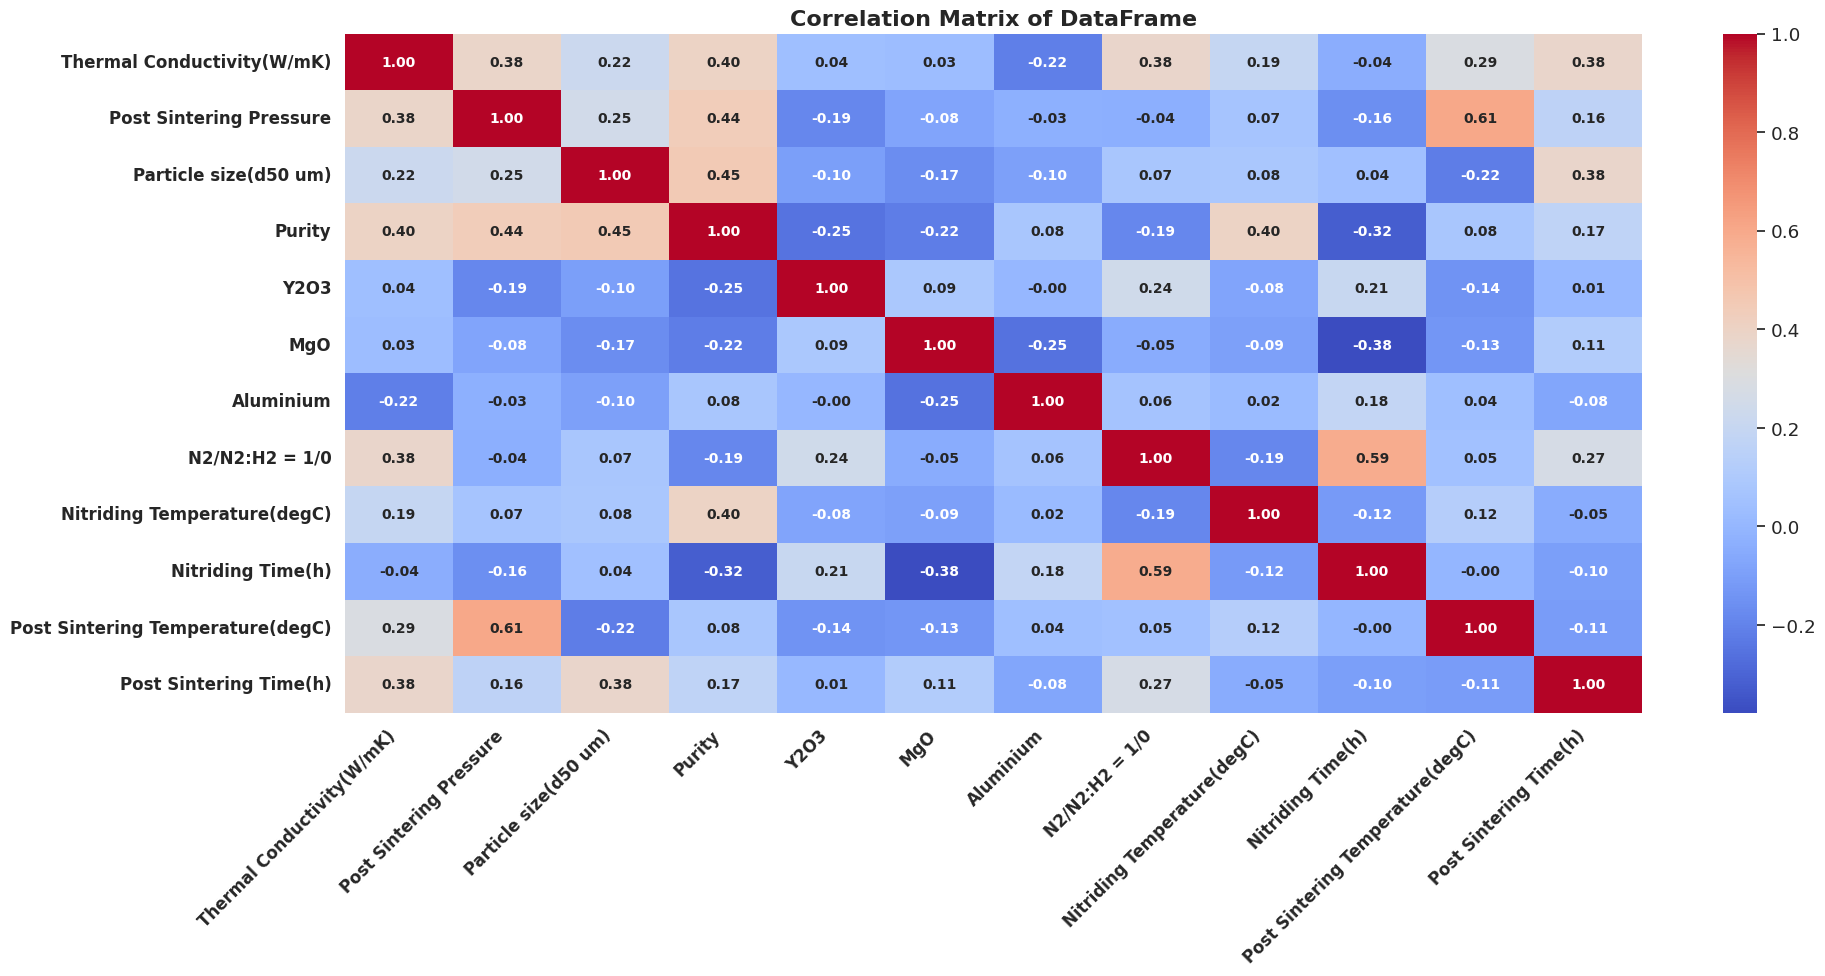

In [ ]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.2) # Optional: Adjust overall font scale
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'fontsize':10, 'fontweight':'bold'})
plt.title('Correlation Matrix of DataFrame', fontsize=16, fontweight='bold') # Optional: Add a title
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold') # Rotate x-axis labels for better readability and make them bolder
plt.yticks(rotation=0, fontsize=12, fontweight='bold') # Ensure y-axis labels are horizontal and make them bolder
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('correlation_matrix_heatmap.png') # Save the figure

<Axes: >

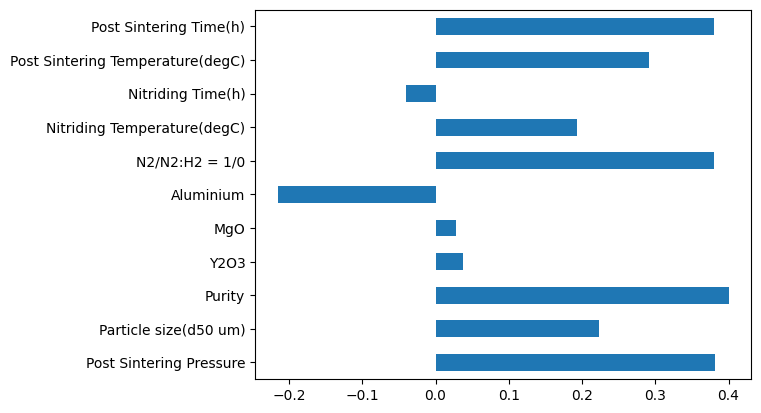

In [ ]:
correlation_plot = df.corr()['Thermal Conductivity(W/mK)'][1:].plot(kind='barh')
correlation_plot

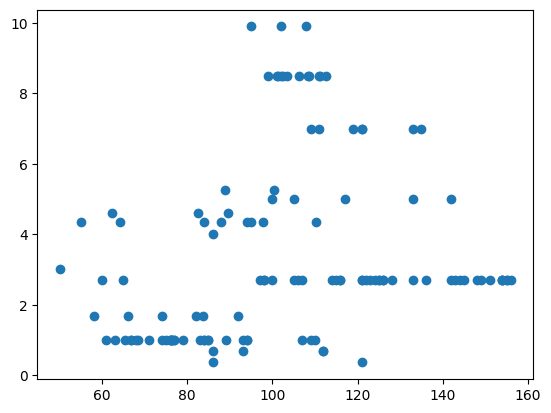

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(df['Thermal Conductivity(W/mK)'], df['Particle size(d50 um)'])

<Axes: xlabel='Thermal Conductivity(W/mK)'>

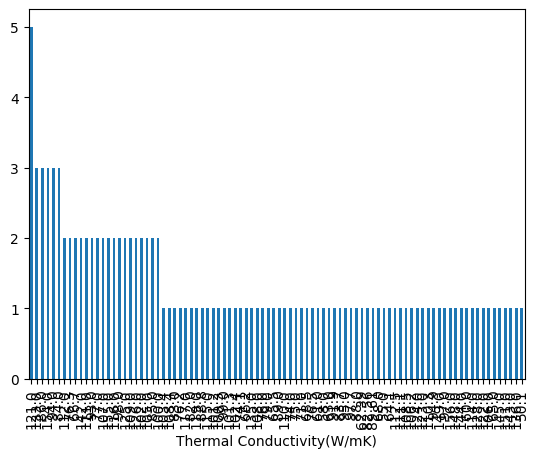

In [ ]:
data = df
fig, ax = plt.subplots()
data['Thermal Conductivity(W/mK)'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
X = df.drop('Thermal Conductivity(W/mK)',axis=1)
y = df['Thermal Conductivity(W/mK)']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
X_test

,Post Sintering Pressure,Particle size(d50 um),Purity,Y2O3,MgO,Aluminium,N2/N2:H2 = 1/0,Nitriding Temperature(degC),Nitriding Time(h),Post Sintering Temperature(degC),Post Sintering Time(h)
18,1.0,7.00,99.91,2.00,0.0,0.0,1.0,1400.0,8.0,1900.0,6.0
45,0.9,1.68,99.99,2.00,0.0,0.4,1.0,1400.0,8.0,1900.0,6.0
47,0.1,1.00,99.00,2.00,5.0,0.0,1.0,1350.0,6.0,1800.0,6.0
89,1.0,2.70,99.99,2.00,3.0,0.0,1.0,1400.0,4.0,1900.0,6.0
4,1.0,8.50,99.99,2.00,5.0,0.0,1.0,1400.0,4.0,1850.0,60.0
40,1.0,7.00,99.91,2.00,0.0,0.0,1.0,1400.0,8.0,1900.0,24.0
62,0.9,1.00,99.90,2.00,5.0,0.0,0.0,1450.0,0.0,1900.0,6.0
107,1.0,2.70,99.99,1.50,5.0,0.0,1.0,1400.0,4.0,1900.0,6.0
31,0.1,1.00,99.00,5.00,5.0,0.0,1.0,1350.0,8.0,1800.0,6.0
55,1.0,1.00,99.00,5.00,5.0,0.0,1.0,1350.0,6.0,1950.0,6.0


array([[<Axes: title={'center': 'Thermal Conductivity(W/mK)'}>,
        <Axes: title={'center': 'Post Sintering Pressure'}>,
        <Axes: title={'center': 'Particle size(d50 um)'}>],
       [<Axes: title={'center': 'Purity'}>,
        <Axes: title={'center': 'Y2O3'}>,
        <Axes: title={'center': 'MgO'}>],
       [<Axes: title={'center': 'Aluminium'}>,
        <Axes: title={'center': 'N2/N2:H2 = 1/0'}>,
        <Axes: title={'center': 'Nitriding Temperature(degC)'}>],
       [<Axes: title={'center': 'Nitriding Time(h)'}>,
        <Axes: title={'center': 'Post Sintering Temperature(degC)'}>,
        <Axes: title={'center': 'Post Sintering Time(h)'}>]], dtype=object)

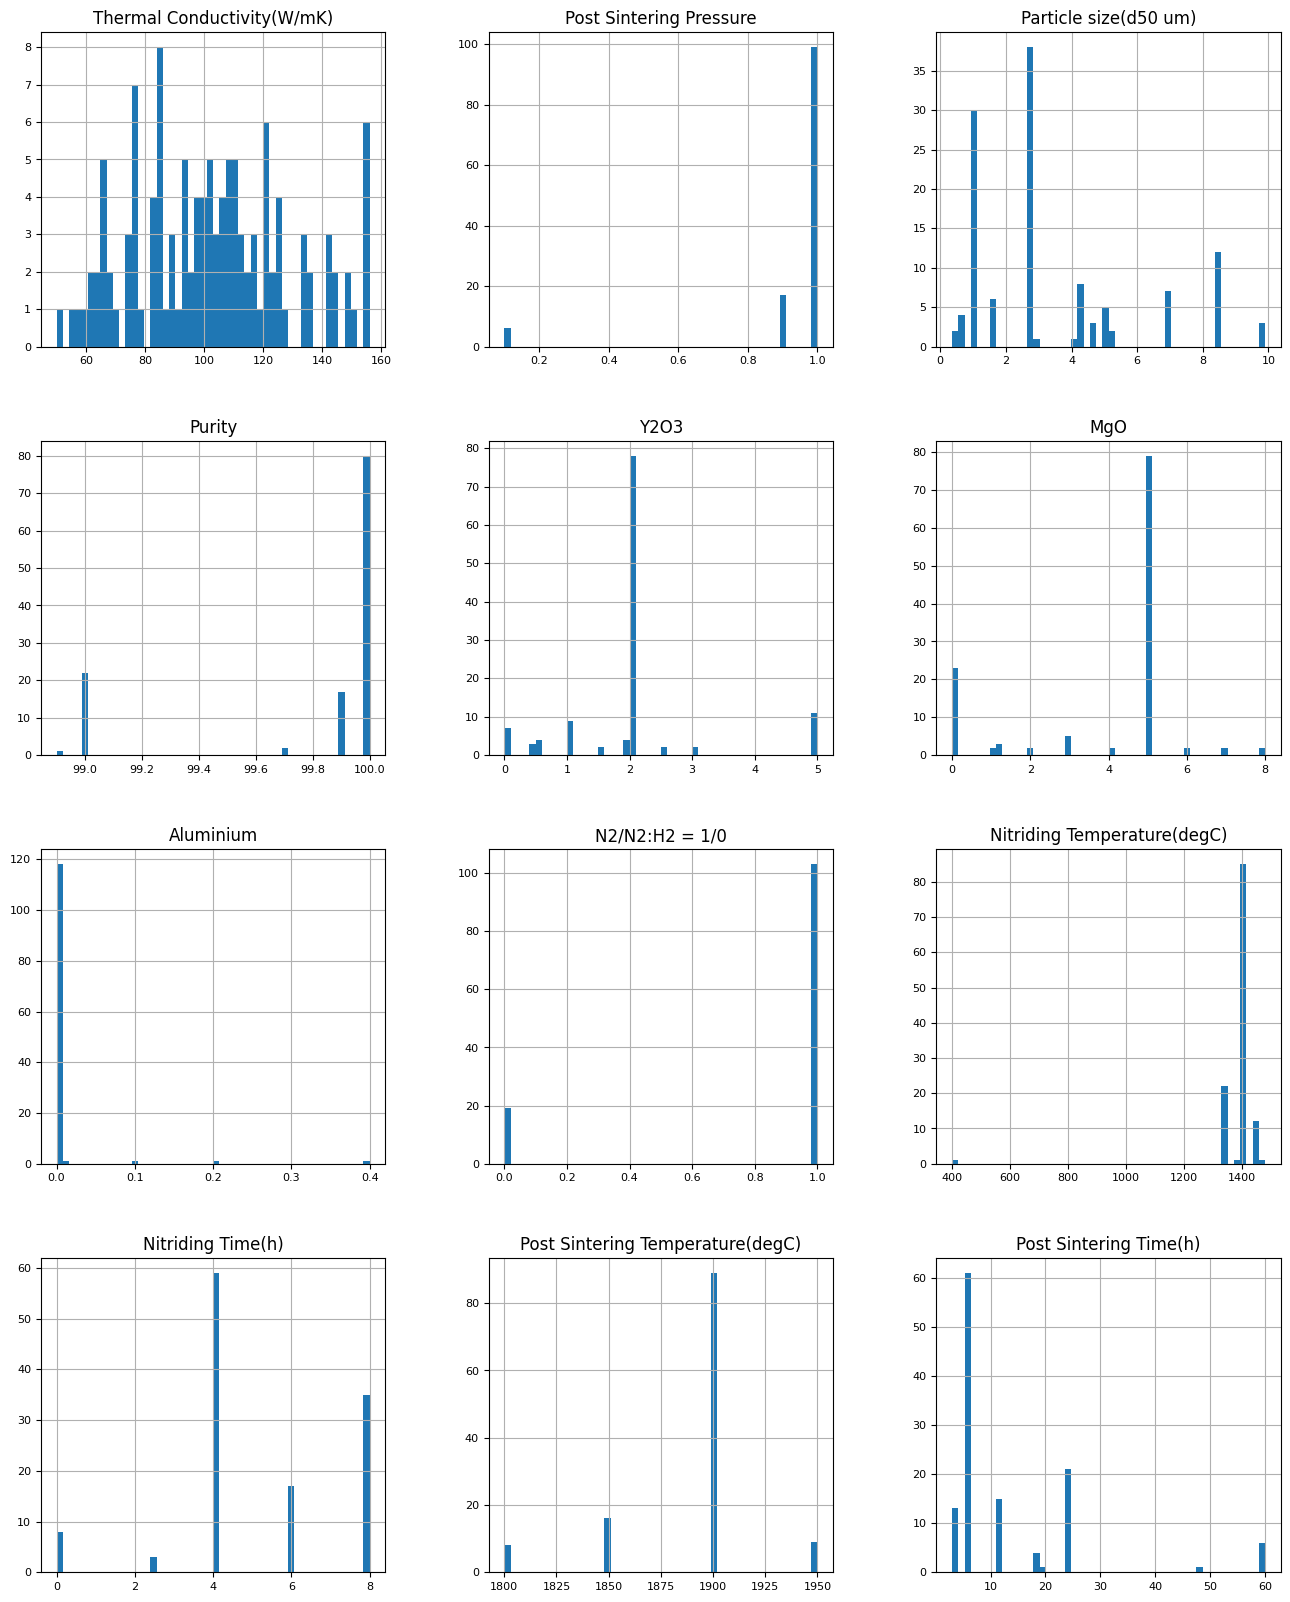

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
len(y_train), len(X_train), len(X_test), len(y_test)

(103, 103, 19, 19)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# my_model = XGBRegressor(max_depth = 2)
# # Add silent=True to avoid printing out updates with each cycle
# my_model.fit(X_train, y_train, verbose=True)

# Define the hyperparameter grid
param_grid = {
        'min_child_weight': [1, 3, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 10]
        }
# param_grid = {'gamma': [0.5, 1, 1.5, 2, 5]}
# Create the XGBoost model object
xgb_model = XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
results = grid_search.fit(X_train, y_train)
results
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
grid_search.cv_results_['mean_test_score']



Best set of hyperparameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.8}
Best score:  0.7325840097680811


array([0.61470525, 0.64803758, 0.65516574, ..., 0.61117294, 0.62888476,
       0.65378273])

In [ ]:
max(grid_search.cv_results_['mean_test_score'])

np.float64(0.7325840097680811)

In [ ]:
from xgboost import XGBRegressor

# grid_search.best_params_
# {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
#  {'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1.0}
my_model = XGBRegressor(colsample_bytree = 0.8, gamma = 0.5, max_depth = 8, min_child_weight = 0.8, subsample = 0.5, learning_rate=0.05,n_estimators=6000)
# Add silent=True to avoid printing out updates with each cycle{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 1.0}
my_model.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=0.8, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=6000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# make predictions
predictions = my_model.predict(X_test)
len(predictions)

19

In [ ]:
#Prediction on training data
peri = my_model.predict(X_train)
peri

array([103.18939 ,  82.07271 ,  66.644104,  74.35172 , 155.10658 ,
       133.60722 ,  83.63483 ,  98.87121 , 107.00616 ,  89.10598 ,
       153.52954 ,  88.64137 , 112.09891 ,  97.42656 , 105.2137  ,
       153.52954 , 125.42424 , 110.99662 ,  83.16977 ,  89.06605 ,
        74.35172 , 104.72444 , 101.42119 , 141.82156 ,  62.36152 ,
        85.99374 ,  85.91431 , 106.563156, 103.18939 ,  74.35172 ,
        82.38714 , 120.31118 ,  79.13795 , 101.42119 , 111.460495,
        71.90742 , 101.42119 , 111.0035  ,  76.49495 ,  73.815216,
        54.94763 ,  89.888405, 103.566345,  93.27375 , 120.31118 ,
       153.82523 , 125.18762 , 100.00315 , 100.165726, 112.38137 ,
       103.18939 , 120.31118 , 108.87903 ,  98.7089  ,  67.060265,
        95.25214 ,  59.598576, 149.37288 ,  93.666534,  85.12895 ,
       106.0864  ,  61.185547,  65.48413 ,  71.90742 , 143.1073  ,
       103.566345, 115.90515 ,  91.82698 , 110.55912 ,  65.082954,
       123.217705, 150.8599  , 108.95863 ,  89.06605 ,  76.170

In [ ]:
len(peri)

103

In [ ]:
import scipy

slope_train, intercept_train, r_value_train, p_value_train, std_err_train = scipy.stats.linregress(y_train, peri)
r_value_train**2

np.float64(0.986631298255489)

In [ ]:
f = pd.DataFrame(y_train)
f['Predictions'] = peri

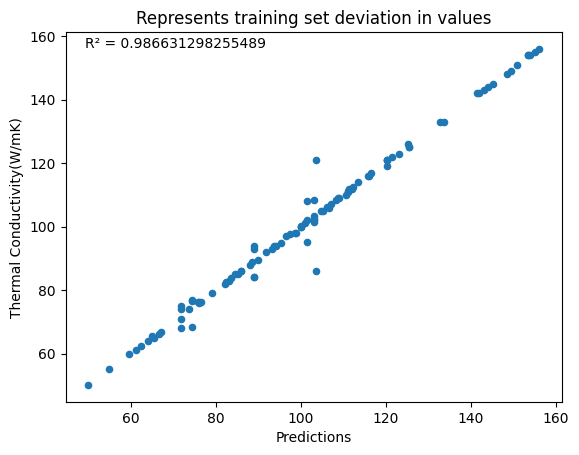

In [ ]:
f.plot.scatter(x='Predictions', y='Thermal Conductivity(W/mK)', title= "Represents training set deviation in values")
plt.text(.01, .99, 'R² = {}'.format(r_value_train**2), ha='left', va='top', transform=ax.transAxes)
plt.savefig('train_r2.png')

In [ ]:
slope_test, intercept_test, r_value_test, p_value_test, std_err_test = scipy.stats.linregress(y_test, predictions)
r_value_test**2

np.float64(0.9602536525054554)

In [ ]:
test_df = pd.DataFrame()
test_df['Thermal Conductivity(W/mK)'] = y_test
test_df['Predicted by model'] = predictions

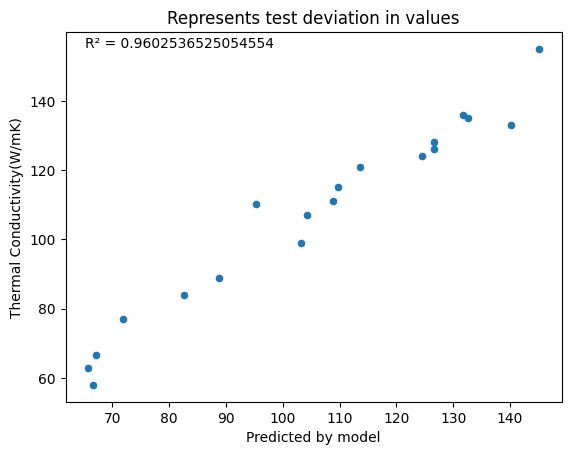

In [ ]:
test_df.plot.scatter(x='Predicted by model', y='Thermal Conductivity(W/mK)', title= "Represents test deviation in values")
plt.text(.01, .99, 'R² = {}'.format(r_value_test**2), ha='left', va='top', transform=ax.transAxes)
plt.savefig('test_r2.png')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Compute RMSE, MAE, MAPE
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE
    mae = mean_absolute_error(y_true, y_pred)  # MAE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE (%)
    return rmse, mae, mape

# Train and Test metrics
rmse_train, mae_train, mape_train = calculate_metrics(y_train, peri)
rmse_test, mae_test, mape_test = calculate_metrics(y_test, predictions)

# Create a results table
metrics_table = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAPE (%)"],
    "Train": [rmse_train, mae_train, mape_train],
    "Test": [rmse_test, mae_test, mape_test]
})

# Print table
print(metrics_table.to_string(index=False))

  Metric    Train     Test
    RMSE 2.970558 5.736115
     MAE 1.174806 4.292880
MAPE (%) 1.264862 4.217121


In [ ]:
from sklearn.model_selection import cross_val_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation R^2 scores for the best model:", cv_scores)
print("Mean CV R^2 score:", cv_scores.mean())
print("Standard deviation of CV R^2 scores:", cv_scores.std())

Cross-validation R^2 scores for the best model: [0.92130711 0.76900772 0.463216   0.78474517 0.72464405]
Mean CV R^2 score: 0.7325840097680811
Standard deviation of CV R^2 scores: 0.1498572955305123


This output shows the R² score for each of the 5 folds during cross-validation, as well as their mean and standard deviation. This confirms the robustness of the tuned model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

print("\n" + "="*60)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [1000, 2000, 3000, 6000],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.001, 0.05, 0.01, 0.1],
    'subsample': [0.4, 0.5, 0.6, 0.7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'colsample_bylevel': [0.6, 0.7, 0.8, 0.9],
    'min_child_weight': [0.5, 1, 1.5, 2],
    'gamma': [0.25, 0.5],
    'max_delta_step': [0.5, 1, 1.5, 2],
    'max_leaves': [25, 27, 28, 30]
}

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=9,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

print("Starting GridSearchCV... This may take a while.")
print(f"Total combinations to evaluate: {np.prod([len(v) for v in param_grid.values()])}")

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("GRID SEARCH RESULTS")
print("="*60)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")


HYPERPARAMETER TUNING WITH GRIDSEARCHCV
Starting GridSearchCV... This may take a while.
Total combinations to evaluate: 1
Fitting 9 folds for each of 1 candidates, totalling 9 fits

GRID SEARCH RESULTS
Best Parameters: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_delta_step': 2, 'max_depth': 8, 'max_leaves': 28, 'min_child_weight': 1, 'n_estimators': 6000, 'subsample': 0.5}
Best CV R² Score: 0.7942


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

print("\n" + "="*60)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [1000, 2000, 3000, 6000],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.001, 0.05, 0.01, 0.1],
    'subsample': [0.4, 0.5, 0.6, 0.7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'colsample_bylevel': [0.6, 0.7, 0.8, 0.9],
    'min_child_weight': [0.5, 1, 1.5, 2],
    'gamma': [0.25, 0.5],
    'max_delta_step': [0.5, 1, 1.5, 2],
    'max_leaves': [25, 27, 28, 30]
}

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

print("Starting GridSearchCV... This may take a while.")
print(f"Total combinations to evaluate: {np.prod([len(v) for v in param_grid.values()])}")

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("GRID SEARCH RESULTS")
print("="*60)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")


HYPERPARAMETER TUNING WITH GRIDSEARCHCV
Starting GridSearchCV... This may take a while.
Total combinations to evaluate: 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits

GRID SEARCH RESULTS
Best Parameters: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_delta_step': 2, 'max_depth': 8, 'max_leaves': 28, 'min_child_weight': 1, 'n_estimators': 6000, 'subsample': 0.5}
Best CV R² Score: 0.7544


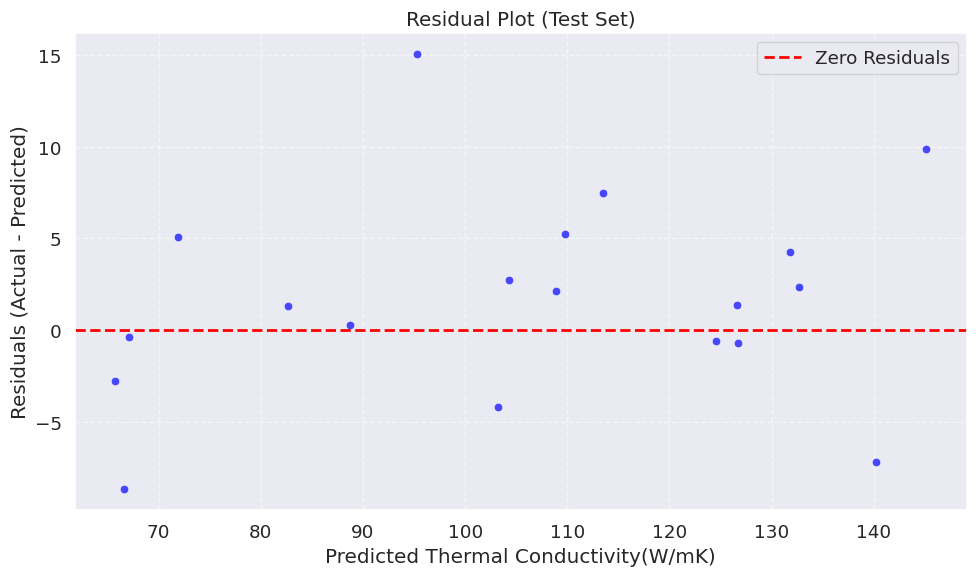

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for the test set
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Thermal Conductivity(W/mK)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('residual_plot.png')
plt.show()

This residual plot displays the difference between the actual thermal conductivity values and the model's predicted values (the residuals) against the predicted values themselves. Ideally, for a good model, the residuals should be randomly scattered around the zero line, with no discernible patterns or trends. Any patterns, such as a funnel shape or a curve, might indicate issues with the model's assumptions or suggest that a different model or transformations might be more appropriate.

Generating Partial Dependence Plot for the most important feature: Particle size(d50 um)


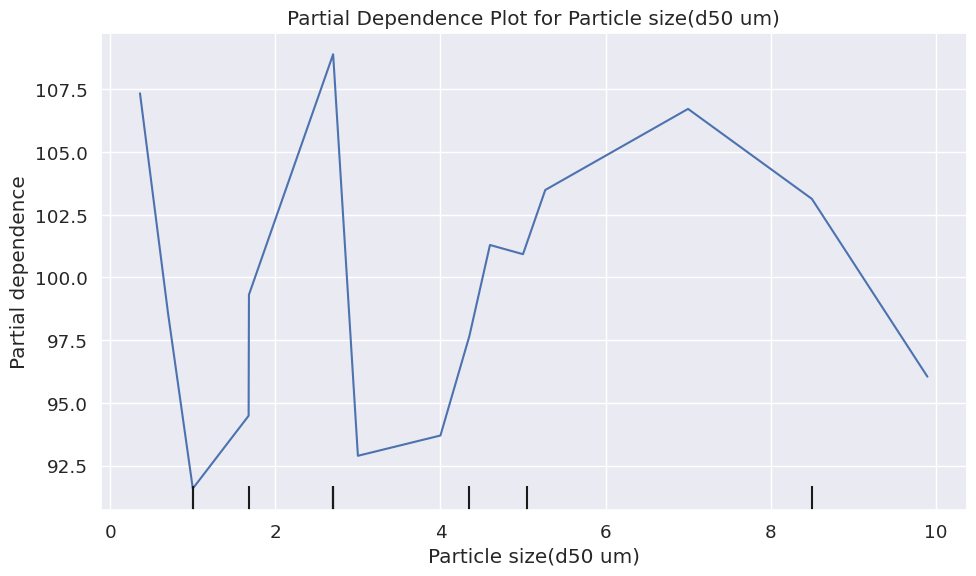

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Get feature importances to identify the most important feature
feature_importances = my_model.feature_importances_
feature_names = X.columns

# Create a pandas Series for easier sorting
importance_series = pd.Series(feature_importances, index=feature_names)
most_important_feature = importance_series.nlargest(1).index.tolist()

print(f"Generating Partial Dependence Plot for the most important feature: {most_important_feature[0]}")

# Create the partial dependence plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(estimator=my_model, X=X, features=most_important_feature, ax=ax, grid_resolution=50)

ax.set_title(f'Partial Dependence Plot for {most_important_feature[0]}')
plt.tight_layout()
plt.savefig('partial_dependence_plot.png')
plt.show()

This partial dependence plot shows the marginal effect of the selected feature (the most important one, based on feature importances) on the predicted thermal conductivity. It indicates how the model's prediction changes as the value of this feature changes, assuming all other features remain constant at their average values.

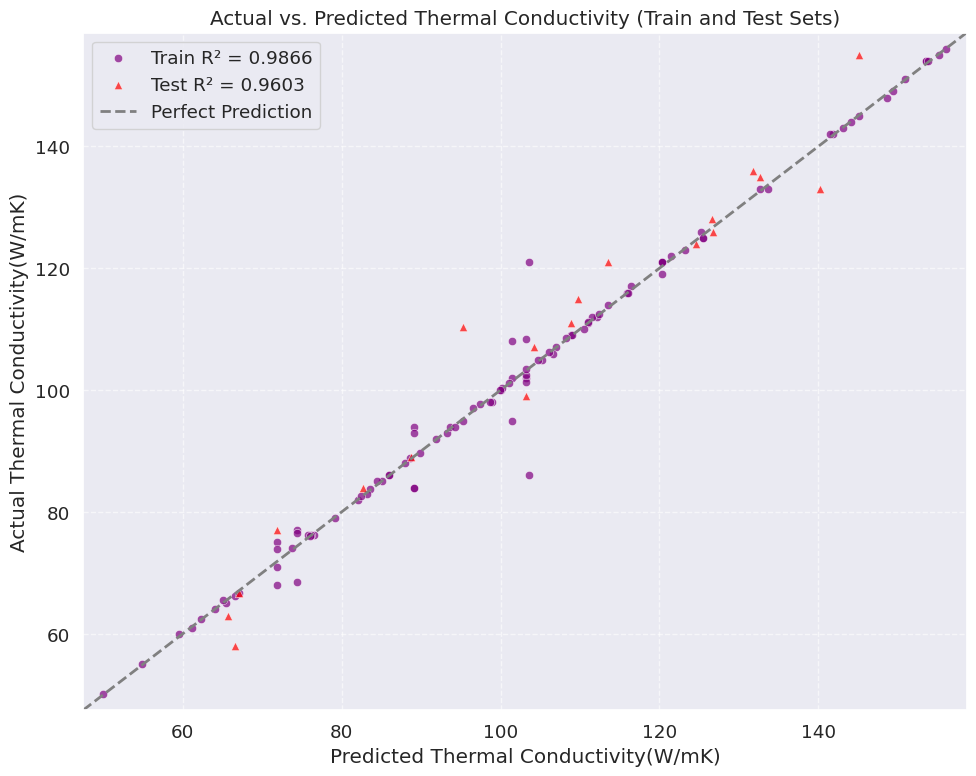

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))

# Combine all actual and predicted values to determine overall min/max for consistent scaling
all_values = pd.concat([
f['Thermal Conductivity(W/mK)'], f['Predictions'],
test_df['Thermal Conductivity(W/mK)'], test_df['Predicted by model']
])
min_val = all_values.min() - (all_values.std() * 0.1) # Add some padding
max_val = all_values.max() + (all_values.std() * 0.1) # Add some padding

sns.scatterplot(x=f['Predictions'], y=f['Thermal Conductivity(W/mK)'], label=f'Train R² = {r_value_train**2:.4f}', alpha=0.7, color='purple', marker='o')
sns.scatterplot(x=test_df['Predicted by model'], y=test_df['Thermal Conductivity(W/mK)'], label=f'Test R² = {r_value_test**2:.4f}', alpha=0.7, color='red', marker='^')

# Add a perfect prediction line (y=x)
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Thermal Conductivity (Train and Test Sets)')
plt.xlabel('Predicted Thermal Conductivity(W/mK)')
plt.ylabel('Actual Thermal Conductivity(W/mK)')
plt.xlim(min_val, max_val) # Set consistent x-axis limits
plt.ylim(min_val, max_val) # Set consistent y-axis limits
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('combined_r2.png')
plt.show()

In [ ]:
f.to_csv('train_actual_vs_predicted.csv', index=False)
print('Training set actual vs. predicted values saved to train_actual_vs_predicted.csv')


Training set actual vs. predicted values saved to train_actual_vs_predicted.csv


In [ ]:
test_df.to_csv('test_actual_vs_predicted.csv', index=False)
print('Test set actual vs. predicted values saved to test_actual_vs_predicted.csv')


Test set actual vs. predicted values saved to test_actual_vs_predicted.csv


In [ ]:
import pandas as pd

# Rename columns for consistency before combining
f_renamed = f.rename(columns={'Predictions': 'Predicted by model'})

# Add a 'Set' column to distinguish between train and test data
f_renamed['Set'] = 'Train'
test_df['Set'] = 'Test'

# Concatenate the two dataframes
combined_df = pd.concat([f_renamed, test_df])

# Save the combined DataFrame to a single CSV file
combined_df.to_csv('all_actual_vs_predicted.csv', index=False)
print('Combined actual vs. predicted values for train and test sets saved to all_actual_vs_predicted.csv')

# Display the head of the combined DataFrame to confirm
display(combined_df.head())

Combined actual vs. predicted values for train and test sets saved to all_actual_vs_predicted.csv


,Thermal Conductivity(W/mK),Predicted by model,Set
89,124.0,123.939003,Train
53,89.0,88.660698,Train
111,106.0,106.907021,Train
99,156.0,155.921463,Train
12,88.8,88.882439,Train
